# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [5]:
sinasc1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc1.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


In [6]:
sinasc1.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [7]:
sinasc2 = sinasc_raw[sinasc_raw['DTNASC'] == '2019-03-06'].groupby(['DTNASC', 'SEXO', 'ESCMAE'])['PESO'].mean().to_frame()
sinasc2

PESO
DTNASC     SEXO      ESCMAE                      
2019-03-06 Feminino  1 a 3 anos       3525.000000
                     12 anos ou mais  3321.428571
                     4 a 7 anos       3252.142857
                     8 a 11 anos      3074.000000
           Masculino 1 a 3 anos       2710.000000
                     12 anos ou mais  3405.555556
                     4 a 7 anos       3692.500000
                     8 a 11 anos      3322.448276

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [8]:
sinasc3 = sinasc_raw[sinasc_raw['QTDFILVIVO'] == 0].groupby(['munResNome'])['QTDFILVIVO'].count().sort_values(ascending=True)[:5]
()
sinasc3

munResNome
Parecis                   8
Primavera de Rondônia    12
Castanheiras             13
Rio Crespo               17
Pimenteiras do Oeste     17
Name: QTDFILVIVO, dtype: int64

In [9]:
sinasc3 = sinasc_raw[sinasc_raw['munResNome'] == 'Parecis'].groupby(['munResNome'])['QTDFILVIVO'].describe()
sinasc3

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Parecis,43.0,1.302326,1.0359,0.0,1.0,1.0,2.0,5.0


In [10]:
sinasc3 = sinasc_raw[sinasc_raw['munResNome'] == 'Parecis'].groupby(['munResNome']).agg({'IDADEMAE': ['mean', 'max', 'min'], 
'IDADEPAI': ['mean', 'max', 'min']})
sinasc3

IDADEMAE           IDADEPAI            
                 mean max min       mean   max   min
munResNome                                          
Parecis     26.454545  41  16  32.473684  61.0  18.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [11]:
sinasc_raw['MES'] = pd.DatetimeIndex(sinasc_raw['DTNASC']).month
sinasc4 = sinasc_raw[sinasc_raw['MES'] == 3].groupby(['MES', 'munResNome'])['QTDFILVIVO'].count().sort_values(ascending=False)[:5]
()
sinasc4

MES  munResNome 
3    Porto Velho    627
     Ji-Paraná      187
     Vilhena        147
     Ariquemes      139
     Cacoal         132
Name: QTDFILVIVO, dtype: int64

In [12]:
sinasc4 = sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho'].groupby(['munResNome'])['QTDFILVIVO'].describe()
sinasc4

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Porto Velho,7319.0,1.167236,1.22264,0.0,0.0,1.0,2.0,12.0


In [13]:
sinasc4 = sinasc_raw[(sinasc_raw['munResNome'] == 'Porto Velho')].groupby(['munResNome']).agg({'IDADEMAE': ['mean', 'max', 
'min'], 'IDADEPAI': ['mean', 'max', 'min']})
sinasc4

IDADEMAE           IDADEPAI            
                 mean max min       mean   max   min
munResNome                                          
Porto Velho  26.31267  47  12  32.352679  65.0  16.0

<Axes: xlabel='munResNome'>

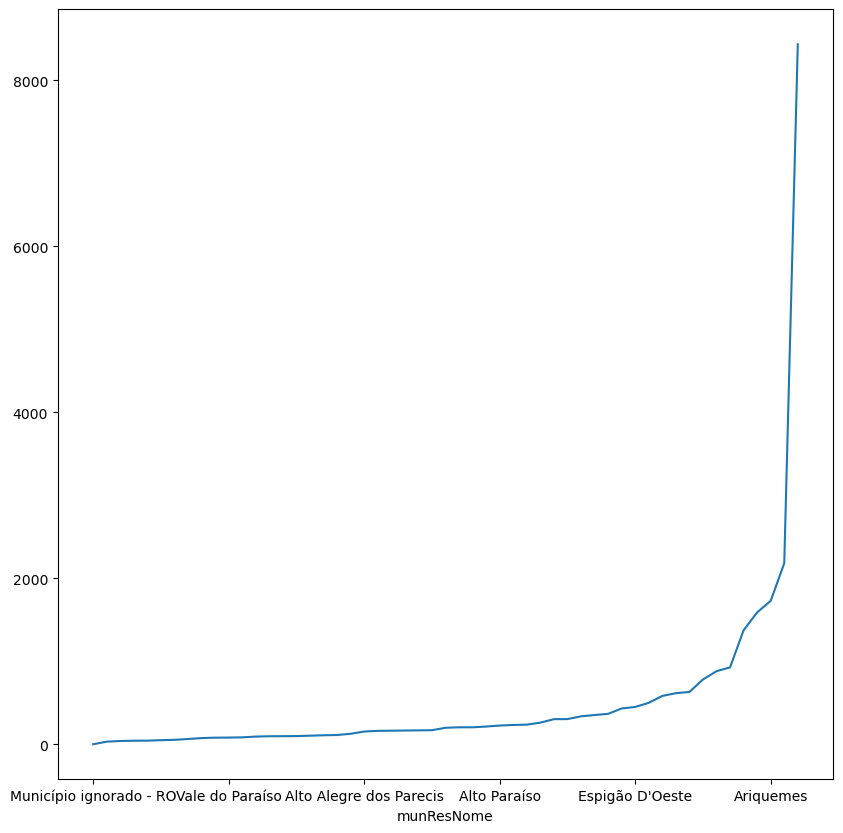

In [14]:
sinasc_raw.groupby(['munResNome'])['CONSULTAS'].count().sort_values().plot(figsize=[10,10])

[Text(0, 0, "Alta Floresta D'Oeste"),
 Text(1, 0, 'Alto Alegre dos Parecis'),
 Text(2, 0, 'Novo Horizonte do Oeste'),
 Text(3, 0, 'Rolim de Moura'),
 Text(4, 0, "São Felipe D'Oeste"),
 Text(5, 0, 'Ariquemes'),
 Text(6, 0, 'Cujubim'),
 Text(7, 0, 'Alto Paraíso'),
 Text(8, 0, 'Monte Negro'),
 Text(9, 0, 'Jaru'),
 Text(10, 0, 'Rio Crespo'),
 Text(11, 0, 'Porto Velho'),
 Text(12, 0, 'Cacaulândia'),
 Text(13, 0, 'Itapuã do Oeste'),
 Text(14, 0, 'Ji-Paraná'),
 Text(15, 0, 'Buritis'),
 Text(16, 0, 'Vilhena'),
 Text(17, 0, 'Vale do Anari'),
 Text(18, 0, 'Candeias do Jamari'),
 Text(19, 0, 'Costa Marques'),
 Text(20, 0, 'Campo Novo de Rondônia'),
 Text(21, 0, "Machadinho D'Oeste"),
 Text(22, 0, 'Colorado do Oeste'),
 Text(23, 0, 'Nova Mamoré'),
 Text(24, 0, 'Urupá'),
 Text(25, 0, 'Ouro Preto do Oeste'),
 Text(26, 0, 'Corumbiara'),
 Text(27, 0, 'São Miguel do Guaporé'),
 Text(28, 0, 'Governador Jorge Teixeira'),
 Text(29, 0, "Santa Luzia D'Oeste"),
 Text(30, 0, 'Pimenta Bueno'),
 Text(31, 0, 'Mi

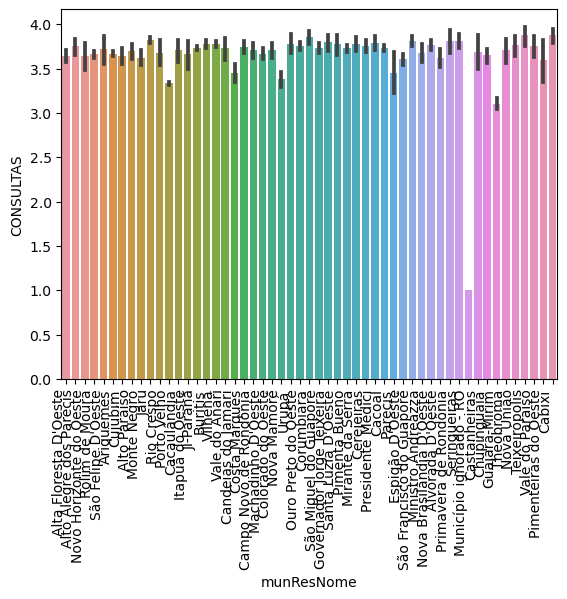

In [15]:
municipio = sns.barplot(x='munResNome', y='CONSULTAS', data=sinasc_raw)
municipio.set_xticklabels(municipio.get_xticklabels(), rotation=90, horizontalalignment='right')